In [142]:
import numpy as np
import random
from math import exp,log
import matplotlib.pyplot as plt
import pandas as pd

In [143]:
# Logical  Gate 학습을 위한 data
X = np.array([(0,0),(1,0),(0,1),(1,1)])
Y_AND = np.array([0,0,0,1])
Y_OR = np.array([0,1,1,1])
Y_XOR = np.array([0,1,1,0])
epoch_num = 100000
# learning_rate = 0.1
# learning_rate = 0.01
learning_rate = 0.005
# learning_rate = 0.001

In [144]:
class logistic_regression_model():
    def __init__(self):
        self.w = np.random.normal(size=2)
        self.b = np.random.normal(size=1)
        
    def sigmoid(self,z):
        return 1/(1+exp(-z))
    
    def predict(self, x):
        z = np.inner(self.w, x) + self.b
        a = self.sigmoid(z)
        return a

In [145]:
def train(X, Y, model, lr = 0.1):
    dw = np.array([0.0,0.0])
    db = 0.0
    m = len(X)
    cost = 0.0
    
    for x,y in zip(X, Y):
        a = model.predict(x)
        if y == 1:
            cost -= log(a)
        else:
            cost -= log(1-a)
    
        dw += (a-y)*x
        db += (a-y)
        
    cost /= m
    model.w -= lr * dw/m
    model.b -= lr*db/m
    return cost

In [146]:
def AND(model):
    cost_list = []
    for epoch in range(epoch_num):
        cost = train(X, Y_AND, model, learning_rate)
        cost_list.append(cost)
    return cost_list
    
def OR(model):
    cost_list = []
    for epoch in range(epoch_num):
        cost = train(X, Y_OR, model, learning_rate)
        cost_list.append(cost)
    return cost_list

def XOR(model):
    cost_list = []
    for epoch in range(epoch_num):
        cost = train(X, Y_XOR, model, learning_rate)
        cost_list.append(cost)
    return cost_list

In [147]:
# AND, OR, XOP paremeter들의 학습과정에서 얻는 cost들을 graph로 표현한다.
def graph(epoch_num, And, Or, Xor):
    x = range(0,epoch_num)
    plt.figure(figsize=(18,6))
    # AND
    plt.subplot(131)
    plt.title("AND")
    plt.plot(x,And)
    #OR
    plt.subplot(132)
    plt.title("OR")
    plt.plot(x,Or)
    #XOR
    plt.subplot(133)
    plt.title("XOR")
    plt.plot(x,Xor)
    plt.show()
    
# AND, OR, XOP paremeter들의 학습과정에서 얻는 cost들을 table로 표현한다..   
def table(epoch_num, And, Or, Xor):
    source = {'Logical AND':And ,'Logical OR':Or ,'Logical XOR':Xor }
    data = pd.DataFrame(source)
    print("0~10000")
    print(data)
    
    extrac = []
    for i in range(epoch_num):
        if i % 100 == 0:
            extrac.append([And[i],Or[i],Xor[i]])
    E = np.array(extrac)
    Esource = {'Logical AND':E[:,0] ,'Logical OR':E[:,1] ,'Logical XOR':E[:,2]}
    Edata = pd.DataFrame(Esource)
    print(Edata)

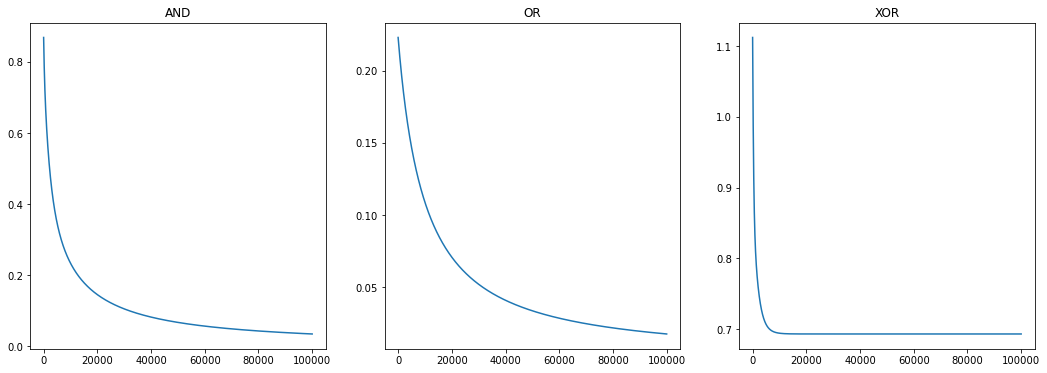

0~10000
       Logical AND  Logical OR  Logical XOR
0         0.868703    0.222975     1.112123
1         0.868244    0.222952     1.111418
2         0.867785    0.222929     1.110713
3         0.867327    0.222906     1.110010
4         0.866870    0.222883     1.109308
...            ...         ...          ...
99995     0.034825    0.017750     0.693147
99996     0.034825    0.017749     0.693147
99997     0.034824    0.017749     0.693147
99998     0.034824    0.017749     0.693147
99999     0.034824    0.017749     0.693147

[100000 rows x 3 columns]
     Logical AND  Logical OR  Logical XOR
0       0.868703    0.222975     1.112123
1       0.826921    0.220692     1.047942
2       0.792177    0.218458     0.995671
3       0.762740    0.216271     0.953591
4       0.737323    0.214130     0.919931
..           ...         ...          ...
995     0.034995    0.017834     0.693147
996     0.034960    0.017817     0.693147
997     0.034926    0.017800     0.693147
998     0.034892 

In [148]:
# 학습시킨 model의 결과를 확인한다.
def model_test(And, Or, Xor,X):
    gate = [And, Or, Xor]
    gate_name = ["AND","OR","XOR"]
    for i in range(3):
        print(gate_name[i])
        for x in X:
            print(x, gate[i].predict(x))
            
# and, or, xor model을 생성하고 학습한다.  
#parameter별 model
and_model = logistic_regression_model()
or_model = logistic_regression_model()
xor_model = logistic_regression_model()

And = AND(and_model)
Or = OR(or_model)
Xor = XOR(xor_model)

# cost변화 확인하기
graph(epoch_num, And, Or, Xor)
table(epoch_num, And, Or, Xor)

In [149]:
model_test(and_model, or_model, xor_model,X)

AND
[0 0] 0.000102758387997585
[1 0] 0.03995467589909155
[0 1] 0.03995620970666051
[1 1] 0.9439906553329915
OR
[0 0] 0.038923479579718784
[1 0] 0.9845361075135772
[0 1] 0.9844238423005939
[1 1] 0.9999899349785712
XOR
[0 0] 0.5000000006415464
[1 0] 0.5000000001006655
[0 1] 0.5000000001006898
[1 1] 0.499999999559809
